# Data Science Internship - Code Clause

### Project 2 : Wine Quality Prediction

### Wine Quality Prediction Dataset From Kaggle

#### By Ujjwal Aggarwal

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Initialising Training Dataset

In [2]:
df = pd.read_csv('C:/Users/ujjwa/Desktop/WineQT.csv')

In [3]:
# View the first 5 rows of the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
# View the last 5 rows of the dataset
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [5]:
# View the random 5 rows of the dataset
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
231,10.0,0.49,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6,325
615,7.2,0.62,0.06,2.5,0.078,17.0,84.0,0.99746,3.51,0.53,9.7,5,863
635,8.3,0.31,0.39,2.4,0.078,17.0,43.0,0.99444,3.31,0.77,12.5,7,898
654,8.6,0.22,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0,7,925
611,8.2,0.26,0.34,2.5,0.073,16.0,47.0,0.99594,3.40,0.78,11.3,7,857


### Shape of the dataset

In [6]:
# View the number of rows and columns of the dataset
df.shape

(1143, 13)

### Information of the dataset

In [7]:
#info() is used to check the information of data and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [8]:
## View the stastical information of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


### Handling missing values

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

### Check Duplicate Records

In [10]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id


In [11]:
df.drop_duplicates(inplace=True)

### Data Visualization

In [12]:
print(df.quality.value_counts())

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


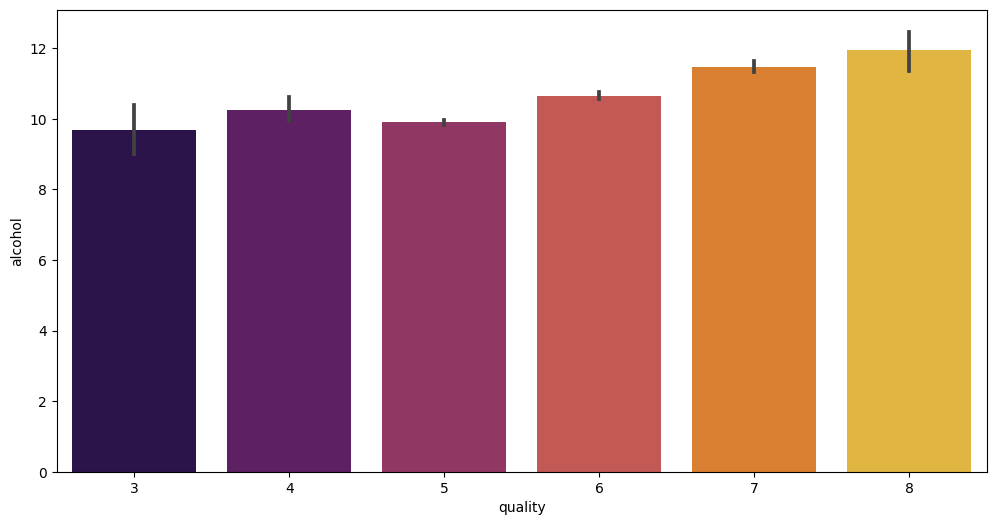

In [14]:
plt.figure(figsize = (12,6))
sns.barplot(x ='quality', y ='alcohol', data = df, palette = 'inferno')
plt.show()

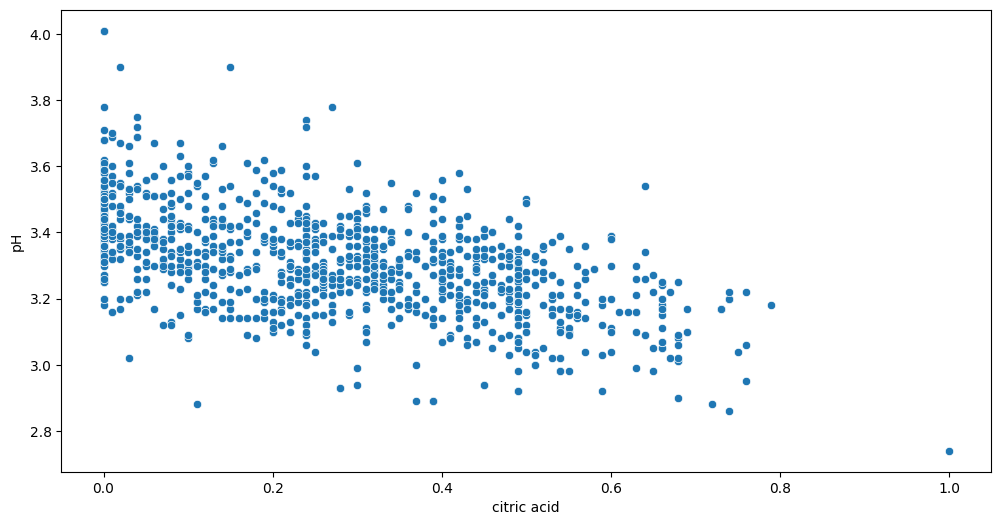

In [15]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'citric acid', y = 'pH', data = df)
plt.show()

### Correlation Matrix

In [16]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


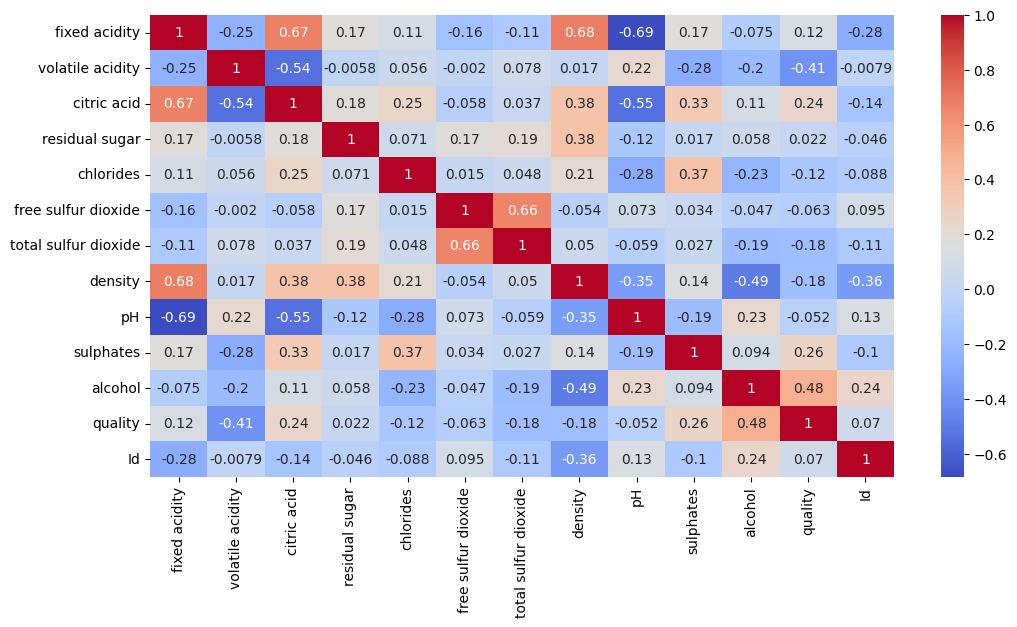

In [17]:
corr = df.corr()
plt.figure(figsize = (12,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

### Divide the dataset into dependent and independent variables

In [18]:
target_name = 'quality'
Y = df[target_name]
X = df.drop(target_name, axis=1)

In [19]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4


In [20]:
X.shape

(1143, 12)

In [21]:
Y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [22]:
Y.shape

(1143,)

### Standard Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_res = sc.fit_transform(X)

In [24]:
x_res.shape

(1143, 12)

In [25]:
X1 = X.drop(['residual sugar', 'density'], axis=1)
X1.shape

(1143, 10)

### Create TRAIN and Test Datasets

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y, test_size=0.2, random_state=7)

In [27]:
X_train.shape, Y_train.shape

((914, 10), (914,))

In [28]:
X_test.shape, Y_train.shape

((229, 10), (914,))

### Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [32]:
print('Train Accuracy:', accuracy_score(Y_train,dt_train_pred)*100)

Train Accuracy: 100.0


In [33]:
print('Accuracy Score', accuracy_score(Y_test,dt_test_pred)*100)

Accuracy Score 58.07860262008734


In [34]:
print(confusion_matrix(Y_test,dt_test_pred))

[[ 0  0  0  0  0  0]
 [ 0  0  3  2  0  0]
 [ 1  3 68 24  2  0]
 [ 0  1 33 49 11  0]
 [ 0  0  4 11 15  0]
 [ 0  0  0  0  1  1]]


In [35]:
print(classification_report(Y_test,dt_test_pred, digits=4))

              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         0
           4     0.0000    0.0000    0.0000         5
           5     0.6296    0.6939    0.6602        98
           6     0.5698    0.5213    0.5444        94
           7     0.5172    0.5000    0.5085        30
           8     1.0000    0.5000    0.6667         2

    accuracy                         0.5808       229
   macro avg     0.4528    0.3692    0.3966       229
weighted avg     0.5798    0.5808    0.5784       229



### Precision of Decision Tree Classifier

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix 
print("precision Score of macro is:", round(precision_score(Y_test, dt_test_pred, average='macro')*100,2)) 
print("precision Score of micro is:", round(precision_score(Y_test,dt_test_pred, average='micro')*180,2)) 
print("precision Score of weighted is:", round(precision_score(Y_test, dt_test_pred, average='weighted')*100,2))

precision Score of macro is: 45.28
precision Score of micro is: 104.54
precision Score of weighted is: 57.98


### Recall of Decision Tree Classifier

In [37]:
print("recall Score of macro is: ", round(recall_score(Y_test,dt_test_pred, average='macro')*100,2)) 
print("recall Score of micro is: ", round(recall_score(Y_test,dt_test_pred, average='micro')*100,2)) 
print("recall Score of weighted is:", round (recall_score(Y_test,dt_test_pred, average='weighted')*100,2))

recall Score of macro is:  36.92
recall Score of micro is:  58.08
recall Score of weighted is: 58.08


### F1_Score of Decision Tree Classifier

In [38]:
print('f1_score of macro :',round (f1_score (Y_test, dt_test_pred, average='macro')*100,2))
print('f1_score of micro:',round (f1_score (Y_test, dt_test_pred, average='micro')*180,2)) 
print('f1_score of weighted :',round (f1_score (Y_test, dt_test_pred, average='weighted')*100,2))

f1_score of macro : 39.66
f1_score of micro: 104.54
f1_score of weighted : 57.84


In [39]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [40]:
input_data = (7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56)
input_data_as_numpy_array = np.array(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = dt.predict(input_data_reshaped)
print(prediction)

[6]


### Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state = 1)
RFC.fit(X_train,Y_train)

RFC_train_pred = RFC.predict(X_train)
RFC_test_pred = RFC.predict(X_test)

In [42]:
print("Train Accuracy:" ,accuracy_score(Y_train,RFC_train_pred)*100)

Train Accuracy: 100.0


In [43]:
print("Accuracy Score:" ,accuracy_score(Y_test,RFC_test_pred)*100)

Accuracy Score: 65.06550218340611


In [44]:
print(confusion_matrix(Y_test, RFC_test_pred))

[[ 0  3  2  0  0]
 [ 0 73 24  1  0]
 [ 0 29 62  3  0]
 [ 0  0 16 14  0]
 [ 0  0  1  1  0]]


In [45]:
print(classification_report(Y_test, RFC_test_pred, digits=4))

              precision    recall  f1-score   support

           4     0.0000    0.0000    0.0000         5
           5     0.6952    0.7449    0.7192        98
           6     0.5905    0.6596    0.6231        94
           7     0.7368    0.4667    0.5714        30
           8     0.0000    0.0000    0.0000         2

    accuracy                         0.6507       229
   macro avg     0.4045    0.3742    0.3828       229
weighted avg     0.6364    0.6507    0.6384       229



### Precision of Random Forest Classifier

In [46]:
print("precision Score of macro is:", round(precision_score(Y_test, RFC_test_pred, average='macro')*100,2)) 
print("precision Score of micro is:", round(precision_score(Y_test,RFC_test_pred, average='micro')*180,2)) 
print("precision Score of weighted is:", round(precision_score(Y_test, RFC_test_pred, average='weighted')*100,2))

precision Score of macro is: 40.45
precision Score of micro is: 117.12
precision Score of weighted is: 63.64


### Recall of Random Forest Classifier

In [47]:
print("recall Score of macro is: ", round(recall_score(Y_test,RFC_test_pred, average='macro')*100,2)) 
print("recall Score of micro is: ", round(recall_score(Y_test,RFC_test_pred, average='micro')*100,2)) 
print("recall Score of weighted is:", round (recall_score(Y_test,RFC_test_pred, average='weighted')*100,2))

recall Score of macro is:  37.42
recall Score of micro is:  65.07
recall Score of weighted is: 65.07


### F1_Score of Random Forest Classifier

In [48]:
print('f1_score of macro :',round (f1_score (Y_test, RFC_test_pred, average='macro')*100,2))
print('f1_score of micro:',round (f1_score (Y_test, RFC_test_pred, average='micro')*180,2)) 
print('f1_score of weighted :',round (f1_score (Y_test, RFC_test_pred, average='weighted')*100,2))

f1_score of macro : 38.28
f1_score of micro: 117.12
f1_score of weighted : 63.84


### Support Vector Classifier

In [49]:
from sklearn.svm  import SVC

In [50]:
svc = SVC(probability=True)
svc.fit(X_train,Y_train)

SVC(probability=True)

In [51]:
svc_train_pred = svc.predict(X_train)
svc_test_pred = svc.predict(X_test)

In [52]:
print("Train Accuracy:" ,accuracy_score(Y_train,svc_train_pred)*100)

Train Accuracy: 47.81181619256017


In [53]:
print("Accuracy Score:" ,accuracy_score(Y_test,svc_test_pred)*100)

Accuracy Score: 41.92139737991266


In [54]:
print(confusion_matrix(Y_test, svc_test_pred))

[[ 0  4  1  0  0]
 [ 0 54 44  0  0]
 [ 0 52 42  0  0]
 [ 0 12 18  0  0]
 [ 0  0  2  0  0]]


In [55]:
print(classification_report(Y_test, svc_test_pred, digits=4))

              precision    recall  f1-score   support

           4     0.0000    0.0000    0.0000         5
           5     0.4426    0.5510    0.4909        98
           6     0.3925    0.4468    0.4179        94
           7     0.0000    0.0000    0.0000        30
           8     0.0000    0.0000    0.0000         2

    accuracy                         0.4192       229
   macro avg     0.1670    0.1996    0.1818       229
weighted avg     0.3505    0.4192    0.3816       229



### Precision of Support Vector Classifier

In [56]:
print("precision Score of macro is:", round(precision_score(Y_test, svc_test_pred, average='macro')*100,2)) 
print("precision Score of micro is:", round(precision_score(Y_test,svc_test_pred, average='micro')*180,2)) 
print("precision Score of weighted is:", round(precision_score(Y_test, svc_test_pred, average='weighted')*100,2))

precision Score of macro is: 16.7
precision Score of micro is: 75.46
precision Score of weighted is: 35.05


### Recall of Support Vector Classifier

In [57]:
print("recall Score of macro is: ", round(recall_score(Y_test,svc_test_pred, average='macro')*100,2)) 
print("recall Score of micro is: ", round(recall_score(Y_test,svc_test_pred, average='micro')*100,2)) 
print("recall Score of weighted is:", round (recall_score(Y_test,svc_test_pred, average='weighted')*100,2))

recall Score of macro is:  19.96
recall Score of micro is:  41.92
recall Score of weighted is: 41.92


### F1_Score of Support Vector Classifier

In [58]:
print('f1_score of macro :',round (f1_score (Y_test, svc_test_pred, average='macro')*100,2))
print('f1_score of micro:',round (f1_score (Y_test, svc_test_pred, average='micro')*180,2)) 
print('f1_score of weighted :',round (f1_score (Y_test, svc_test_pred, average='weighted')*100,2))

f1_score of macro : 18.18
f1_score of micro: 75.46
f1_score of weighted : 38.16


### ..........END..........